## csv 읽어서 df 불러오기

In [2]:
import pandas as pd

PATH = 'C:/project/Used Car Price Predictor/Used-Car-Price-Predictor/insurance_history'

df =pd.read_csv(PATH)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_number       2327 non-null   object 
 1   cno              2328 non-null   int64  
 2   total_loss       2313 non-null   object 
 3   robbery          2313 non-null   object 
 4   submerged        2313 non-null   object 
 5   special_use      2313 non-null   object 
 6   my_damage        2313 non-null   object 
 7   opponent_damage  2313 non-null   object 
 8   owner_changes    2313 non-null   object 
 9   number_changes   2313 non-null   object 
 10  rental_use       2313 non-null   object 
 11  business_use     2313 non-null   object 
 12  official_use     2313 non-null   object 
 13  도장               370 non-null    float64
 14  탈착               370 non-null    float64
 15  교환               370 non-null    float64
 16  판금               370 non-null    float64
 17  수리            

In [25]:
df.describe()

,cno,도장,탈착,교환,판금,수리,기타
count,2.328000e+03,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,2.225498e+06,4.032432,5.721622,3.662162,1.845946,0.564865,1.840541
std,1.840543e+04,3.589963,4.933797,3.487014,2.218559,0.947030,2.383089
min,1.755508e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.226116e+06,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,2.230226e+06,3.000000,4.500000,3.000000,1.000000,0.000000,1.000000
75%,2.231938e+06,5.750000,7.000000,5.000000,3.000000,1.000000,2.000000
max,2.232961e+06,26.000000,29.000000,24.000000,16.000000,7.000000,21.000000


In [45]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

기타                 1958
수리                 1958
판금                 1958
교환                 1958
탈착                 1958
도장                 1958
total_loss           15
official_use         15
business_use         15
rental_use           15
number_changes       15
owner_changes        15
opponent_damage      15
my_damage            15
special_use          15
submerged            15
robbery              15
car_number            1
dtype: int64


## 결측치 확인 및 처리

In [3]:
# 결측지만 있는 행삭제
drop_rows = df[df['total_loss'].isna()].index
drop_rows

Index([ 134,  147,  184,  426,  507,  529,  655,  905, 1143, 1326, 1387, 1825,
       1829, 1989, 2074],
      dtype='int64')

In [4]:
df.drop(drop_rows,inplace=True)

In [5]:
# 결측값 비율이 50% 넘는 열 삭제
drop_cols = []
print(len(df))
for col in df.keys() :
    if (df[col].isna().sum() / len(df)) > 0.5 :
        drop_cols.append(col)
drop_cols

2313


['도장', '탈착', '교환', '판금', '수리', '기타']

In [6]:
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use
0,224호1907,2231468,없음,없음,없음,있음,없음,없음,없음,없음,없음,없음,없음
1,200호2426,2220495,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
2,201호3920,2224830,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
3,200호8957,2222060,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
4,201호8070,2225827,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음


car_number의 고유값 개수 : 2282
car_number
번호판없음       31
224호1907     1
74두6005      1
30로0627      1
43머0571      1
            ..
08보0778      1
50조7708      1
43가2247      1
30두8432      1
46구3338      1
Name: count, Length: 2282, dtype: int64


total_loss의 고유값 개수 : 2
total_loss
0    2300
1      13
Name: count, dtype: int64


robbery의 고유값 개수 : 1
robbery
0    2313
Name: count, dtype: int64


submerged의 고유값 개수 : 1
submerged
없음    2313
Name: count, dtype: int64


special_use의 고유값 개수 : 2
special_use
없음    2025
있음     288
Name: count, dtype: int64


my_damage의 고유값 개수 : 1008
my_damage
0회 (0원)            1294
1회 (0원)              12
1회 (1,120,000원)       2
1회 (1,004,283원)       1
3회 (7,198,660원)       1
                   ... 
2회 (3,158,992원)       1
1회 (889,908원)         1
1회 (1,265,929원)       1
2회 (2,222,919원)       1
1회 (1,254,750원)       1
Name: count, Length: 1008, dtype: int64


opponent_damage의 고유값 개수 : 695
opponent_damage
0                  1605
1회 (0원)              13
1회 (360,000원)   

In [77]:
df

,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use
0,224호1907,2231468,없음,없음,없음,있음,없음,없음,없음,없음,없음,없음,없음
1,200호2426,2220495,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
2,201호3920,2224830,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
3,200호8957,2222060,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
4,201호8070,2225827,없음,없음,없음,있음,없음,없음,없음,없음,있음,없음,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,233오4642,2209805,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2324,49오9576,2209804,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2325,34너2236,2209497,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음
2326,46구3338,2206650,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음,없음


In [7]:
df.loc[(df['total_loss'] == '없음') | (df['total_loss'] == '회'), ('total_loss')] = 0
df.loc[(df['robbery'] == '없음') | (df['robbery'] == '회'), ('robbery')] = 0
df.loc[(df['my_damage'] == '없음') | (df['my_damage'] == '회'), ('my_damage')] = 0
df.loc[(df['opponent_damage'] == '없음') | (df['opponent_damage'] == '회'), ('opponent_damage')] = 0
df.loc[(df['owner_changes'] == '없음') | (df['owner_changes'] == '회'), ('owner_changes')] = 0
df.loc[(df['number_changes'] == '없음') | (df['number_changes'] == '회'), ('number_changes')] = 0
print(df['total_loss'].unique())
print(df['robbery'].unique())

[0 '1회']
[0]


In [8]:
# n회 => n
temp_col = ['total_loss','robbery','owner_changes','number_changes']

for col in temp_col :
   df.loc[(df[col]!=0),col] = df.loc[df[col] != 0, col].str.strip('회 ')


In [50]:
import re

split_col = ['my_damage','opponent_damage']
df.loc[df['my_damage'] == 0, 'my_damage'] = '0회 (0원)'
# temp = df.loc[df['my_damage'] != 0, 'my_damage'].str.split('/')

df[['my_damage_cnt', 'my_damage_price']] = df['my_damage'].str.replace(pat=r'[^0-9 ]', repl='', regex=True).str.split(' ', expand=True)


#re.findall('[0-9]+',df['my_damage'].str)

,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use,my_damage_cnt,my_damage_price
2323,233오4642,2209805,0,0,없음,없음,0회 (0원),0,0,0,없음,없음,없음,0,0
2324,49오9576,2209804,0,0,없음,없음,0회 (0원),0,0,0,없음,없음,없음,0,0
2325,34너2236,2209497,0,0,없음,없음,0회 (0원),0,0,0,없음,없음,없음,0,0
2326,46구3338,2206650,0,0,없음,없음,0회 (0원),0,0,0,없음,없음,없음,0,0
2327,번호판없음,2209102,0,0,없음,없음,0회 (0원),0,0,0,없음,없음,없음,0,0


In [51]:

df.loc[df['opponent_damage'] == 0, 'opponent_damage'] = '0회 (0원)'
# temp = df.loc[df['opponent_damage'] != 0, 'opponent_damage'].str.split('/')

df[['opponent_damage_cnt', 'opponent_damage_price']] = df['opponent_damage'].str.replace(pat=r'[^0-9 ]', repl='', regex=True).str.split(' ', expand=True)



,car_number,cno,total_loss,robbery,submerged,special_use,my_damage,opponent_damage,owner_changes,number_changes,rental_use,business_use,official_use,my_damage_cnt,my_damage_price,opponent_damage_cnt,opponent_damage_price
0,224호1907,2231468,0,0,없음,있음,0회 (0원),0회 (0원),0,0,없음,없음,없음,0,0,0,0
1,200호2426,2220495,0,0,없음,있음,0회 (0원),0회 (0원),0,0,있음,없음,없음,0,0,0,0
2,201호3920,2224830,0,0,없음,있음,0회 (0원),0회 (0원),0,0,있음,없음,없음,0,0,0,0
3,200호8957,2222060,0,0,없음,있음,0회 (0원),0회 (0원),0,0,있음,없음,없음,0,0,0,0
4,201호8070,2225827,0,0,없음,있음,0회 (0원),0회 (0원),0,0,있음,없음,없음,0,0,0,0


In [55]:
df.pop('my_damage')
df.pop('opponent_damage')
df.sort_values(by='opponent_damage_cnt',ascending=False).head()

,car_number,cno,total_loss,robbery,submerged,special_use,owner_changes,number_changes,rental_use,business_use,official_use,my_damage_cnt,my_damage_price,opponent_damage_cnt,opponent_damage_price
79,24루8314,2223650,0,0,없음,없음,1,0,없음,없음,없음,11,13166844,9,8474586
682,76수5144,2232578,0,0,없음,없음,4,0,없음,없음,없음,6,5936961,8,7533092
39,18무8128,2232741,0,0,없음,없음,5,0,없음,없음,없음,4,1004730,8,5308439
89,57수2961,2231228,0,0,없음,없음,4,0,없음,없음,없음,7,6051359,8,5035786
875,24로7100,2228204,0,0,없음,없음,2,0,없음,없음,없음,8,8745301,8,7033430


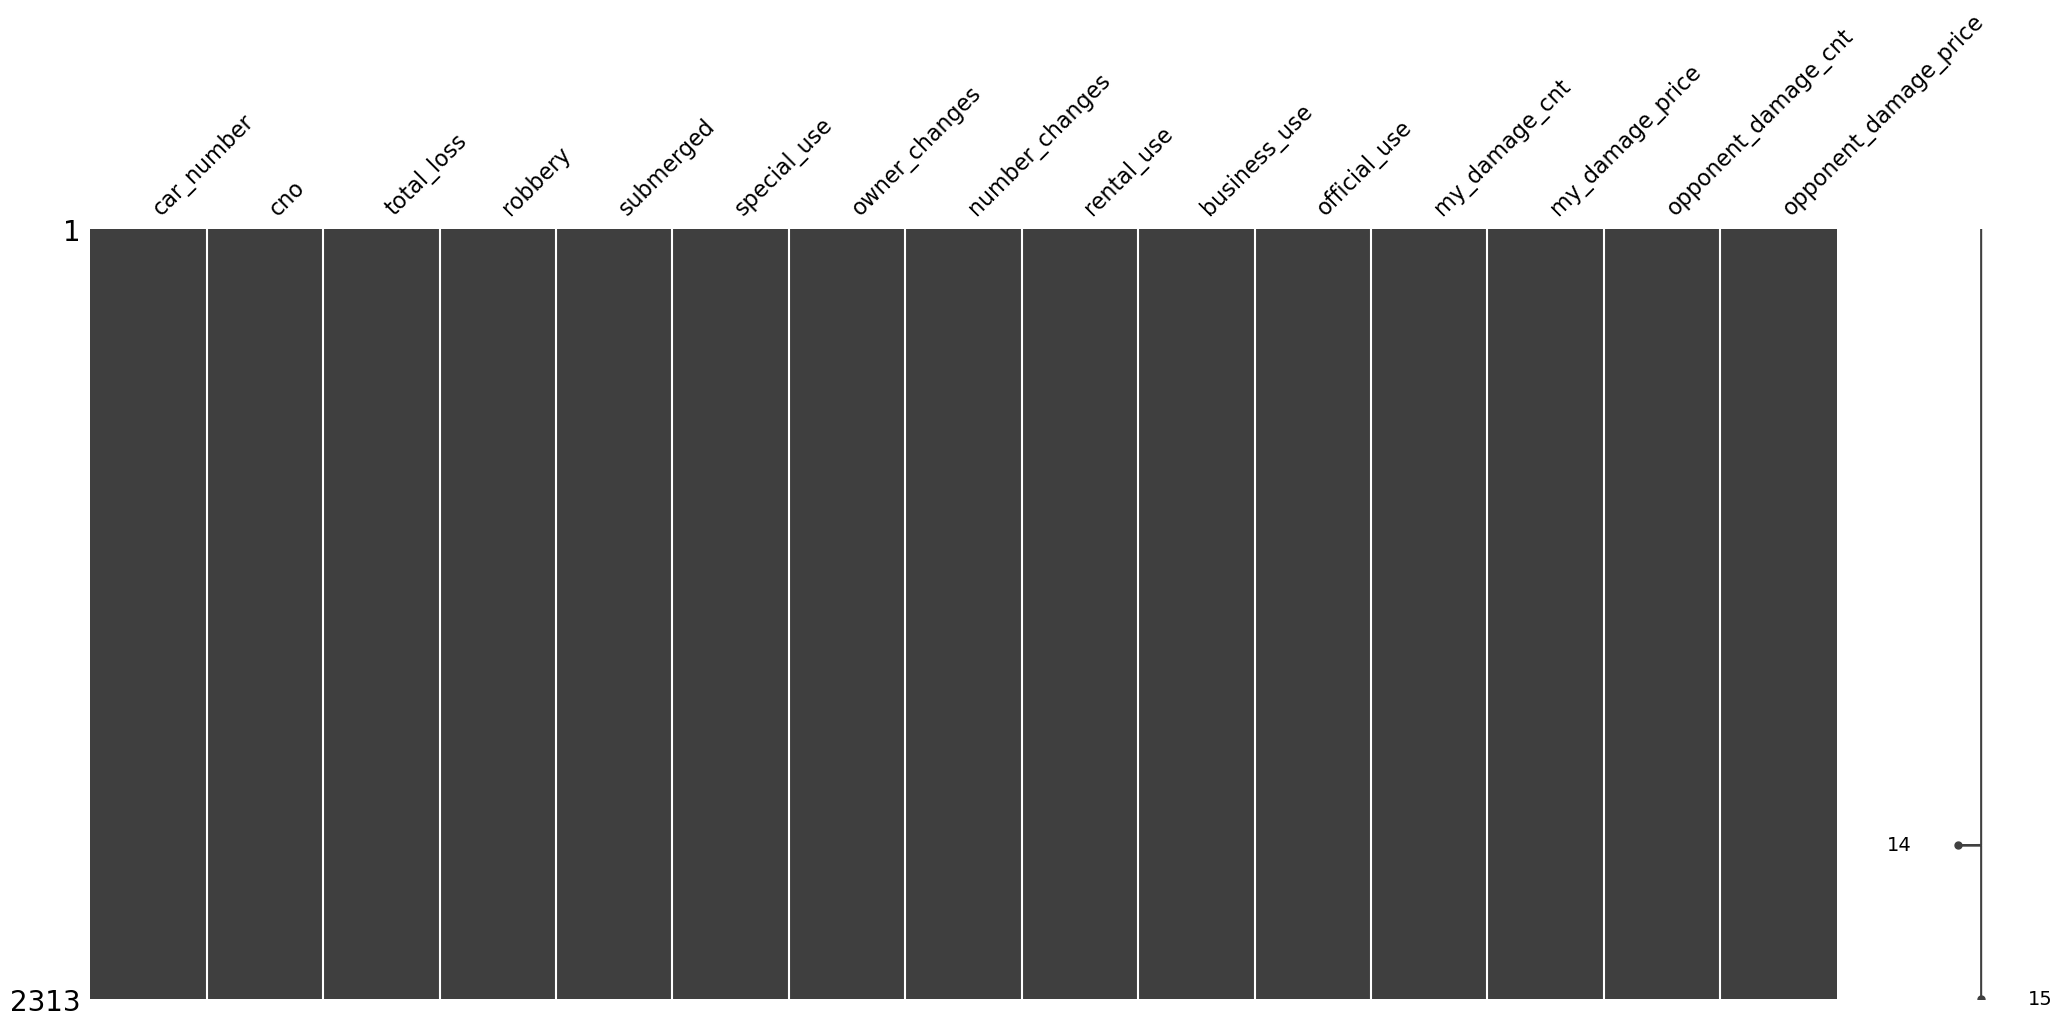

In [56]:
import missingno as msno
import matplotlib.pyplot as plt

# print(msno.__file__)
msno.matrix(df)
plt.show()

In [57]:
df.to_csv('insurance_history_handled')

In [58]:
#범주형 변수
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features :
    print(f"{feature}의 고유값 개수 : {df[feature].nunique()}")

    print(df[feature].value_counts())
    print('\n')

car_number의 고유값 개수 : 2282
car_number
번호판없음       31
224호1907     1
74두6005      1
30로0627      1
43머0571      1
            ..
08보0778      1
50조7708      1
43가2247      1
30두8432      1
46구3338      1
Name: count, Length: 2282, dtype: int64


total_loss의 고유값 개수 : 2
total_loss
0    2300
1      13
Name: count, dtype: int64


robbery의 고유값 개수 : 1
robbery
0    2313
Name: count, dtype: int64


submerged의 고유값 개수 : 1
submerged
없음    2313
Name: count, dtype: int64


special_use의 고유값 개수 : 2
special_use
없음    2025
있음     288
Name: count, dtype: int64


owner_changes의 고유값 개수 : 19
owner_changes
0     1068
1      438
2      247
3      191
4      119
5      100
6       52
7       30
9       19
8       18
10       8
13       6
12       5
11       5
15       2
14       2
20       1
25       1
17       1
Name: count, dtype: int64


number_changes의 고유값 개수 : 7
number_changes
0    1871
1     374
2      50
3      13
4       2
5       2
8       1
Name: count, dtype: int64


rental_use의 고유값 개수 : 2
rental_use

## 수치형 데이터 처리

### 분포 확인

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2313 entries, 0 to 2327
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   car_number             2312 non-null   object
 1   cno                    2313 non-null   int64 
 2   total_loss             2313 non-null   object
 3   robbery                2313 non-null   object
 4   submerged              2313 non-null   object
 5   special_use            2313 non-null   object
 6   owner_changes          2313 non-null   object
 7   number_changes         2313 non-null   object
 8   rental_use             2313 non-null   object
 9   business_use           2313 non-null   object
 10  official_use           2313 non-null   object
 11  my_damage_cnt          2313 non-null   object
 12  my_damage_price        2313 non-null   object
 13  opponent_damage_cnt    2313 non-null   object
 14  opponent_damage_price  2313 non-null   object
dtypes: int64(1), object(14)
me

In [66]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['cno'], dtype='object')

### IQR 

In [63]:
import numpy as np

Q1 = np.percentile(df['my_damage_price'], 25)  # 1사분위수 계산
Q3 = np.percentile(df['my_damage_price'], 75)  # 3사분위수 계산
IQR = Q3 -Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5* IQR

outliers = df[(df['my_damage_price'] < lower_bound) | (df['my_damage_price'] > upper_bound)].index
print(f'my_damage_price의 이상치 인덱스 : {outliers}')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None